In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
url = 'https://github.com/BarkhaM21/AI4CCEE_Fall_2024/raw/main/in_class_activity/Lecture5/Car_Speed.csv'
df = pd.read_csv(url)

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Show the first few rows
print(df.head())


   day                Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1 2022-07-10 00:00:00            NaN            NaN            3.0   
1    1 2022-07-10 00:01:00           10.0           62.0            2.0   
2    1 2022-07-10 00:02:00            5.0           63.6            4.0   
3    1 2022-07-10 00:03:00           11.0           58.2            9.0   
4    1 2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


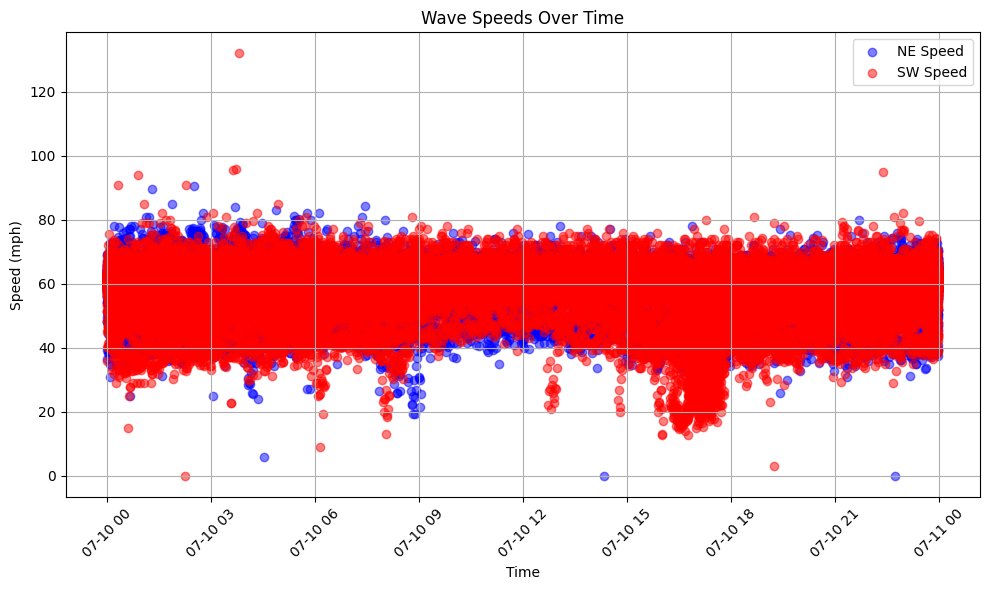

In [ ]:
# Scatter plot for NE and SW speed against Time
plt.figure(figsize=(10,6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], label='NE Speed', color='blue', alpha=0.5)
plt.scatter(df['Time'], df['WAVE-SW-Speed'], label='SW Speed', color='red', alpha=0.5)

# Labels and title
plt.title('Wave Speeds Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare data for regression: let's take NE speed as the target
X = df[['Time']].apply(lambda x: x.astype(int) // 10**9)  # Convert datetime to numeric for regression
y = df['WAVE-NE-Speed'].fillna(0)  # Fill missing values for simplicity

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')


Training set: (178438, 1), Testing set: (44610, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error: 105.71183343355088
Mean Absolute Error (MAE): 4.323156084377157
Root Mean Squared Error (RMSE): 10.281626011169191


In [ ]:
# df['hour'] = df['Time'].dt.hour
# df['day'] = df['Time'].dt.day


In [ ]:
# 2. Polynomial Features:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)


In [ ]:
# 3. Regularization:

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f'Ridge RMSE: {rmse_ridge}')


Ridge RMSE: 9.498492474654647


The Root Mean Squared Error (RMSE) of **9.4** indicates that, on average, the model's predictions deviate from the actual values by approximately 9.4 units of the target variable (in your case, speed). RMSE is sensitive to large errors, meaning the model might be consistently off by 9.4 mph when predicting wave speeds. This relatively high value could be due to:
1. Inherent variability in the data.
2. Insufficient features or nonlinear relationships not captured by the model.
3. Overfitting or underfitting issues.

Improving the model with additional features, transformations, or regularization might reduce this error.

## CLEANING THE DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
url = 'https://github.com/BarkhaM21/AI4CCEE_Fall_2024/raw/main/in_class_activity/Lecture5/Car_Speed.csv'
df = pd.read_csv(url)

df_days_1_to_2 = df[df['day'].between(1, 5)]
df = df_days_1_to_2

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Remove rows where WAVE-NE-Speed or WAVE-SW-Speed is zero
df_cleaned = df[(df['WAVE-NE-Speed'] != 0) & (df['WAVE-SW-Speed'] != 0)]

# Check the cleaned data
print(df_cleaned.head())



   day                Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1 2022-07-10 00:00:00            NaN            NaN            3.0   
1    1 2022-07-10 00:01:00           10.0           62.0            2.0   
2    1 2022-07-10 00:02:00            5.0           63.6            4.0   
3    1 2022-07-10 00:03:00           11.0           58.2            9.0   
4    1 2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


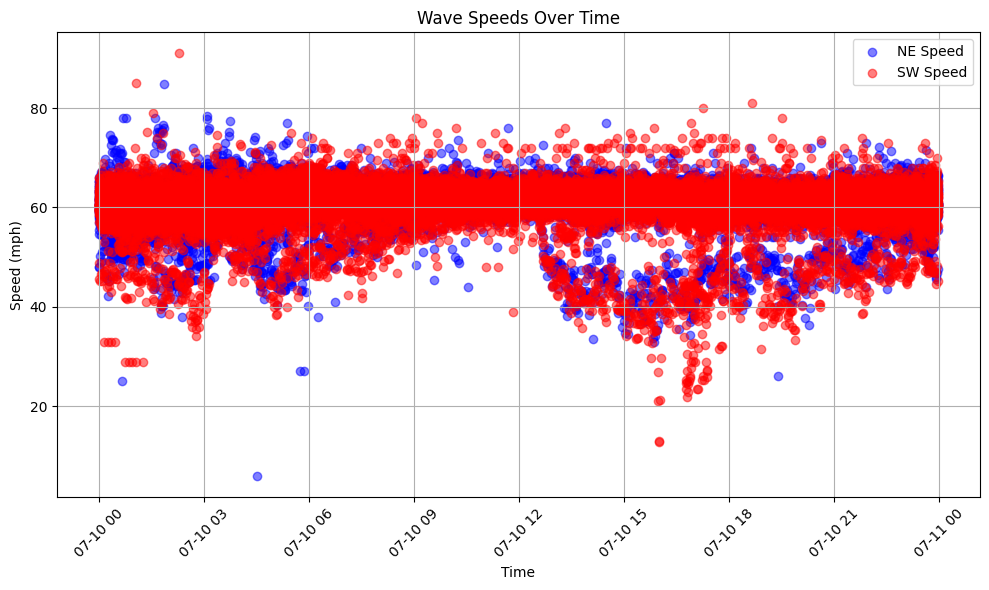

In [ ]:
# Scatter plot for NE and SW speed against Time
plt.figure(figsize=(10,6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], label='NE Speed', color='blue', alpha=0.5)
plt.scatter(df['Time'], df['WAVE-SW-Speed'], label='SW Speed', color='red', alpha=0.5)

# Labels and title
plt.title('Wave Speeds Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare data for regression: let's take NE speed as the target
X = df[['Time']].apply(lambda x: x.astype(int) // 10**9)  # Convert datetime to numeric for regression
y = df['WAVE-NE-Speed'].fillna(0)  # Fill missing values for simplicity

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')


Training set: (28147, 1), Testing set: (7037, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error: 105.71183343355088
Mean Absolute Error (MAE): 4.323156084377157
Root Mean Squared Error (RMSE): 10.281626011169191


<ipython-input-95-018b24215aaa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_for_clustering['cluster'] = kmeans.fit_predict(X_cluster)


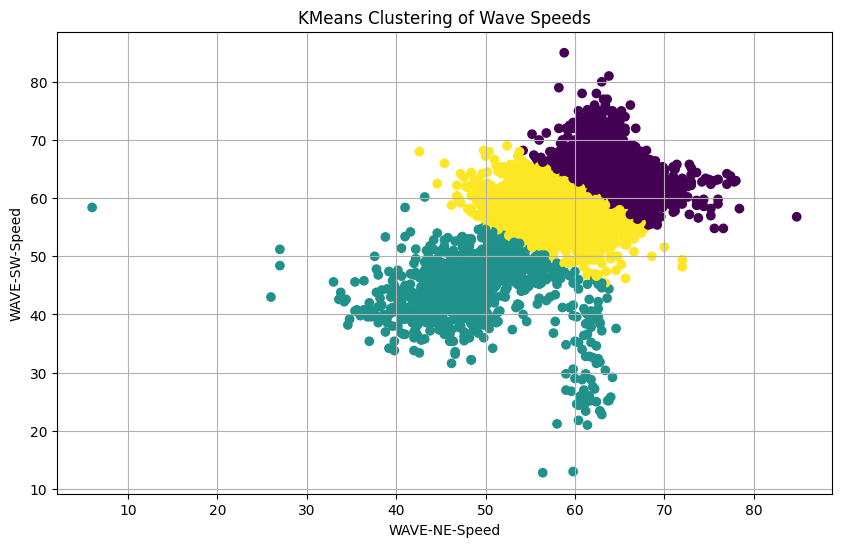

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with NaN in the selected columns for clustering
df_cleaned_for_clustering = df.dropna(subset=['WAVE-NE-Speed', 'WAVE-SW-Speed'])

# Select features for clustering (e.g., WAVE-NE-Speed and WAVE-SW-Speed)
X_cluster = df_cleaned_for_clustering[['WAVE-NE-Speed', 'WAVE-SW-Speed']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned_for_clustering['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize the clusters on a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X_cluster['WAVE-NE-Speed'], X_cluster['WAVE-SW-Speed'], c=df_cleaned_for_clustering['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Wave Speeds')
plt.xlabel('WAVE-NE-Speed')
plt.ylabel('WAVE-SW-Speed')
plt.grid(True)
plt.show()



<ipython-input-101-712b71f38fec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_for_clustering['dbscan_cluster'] = dbscan.fit_predict(X_cluster)


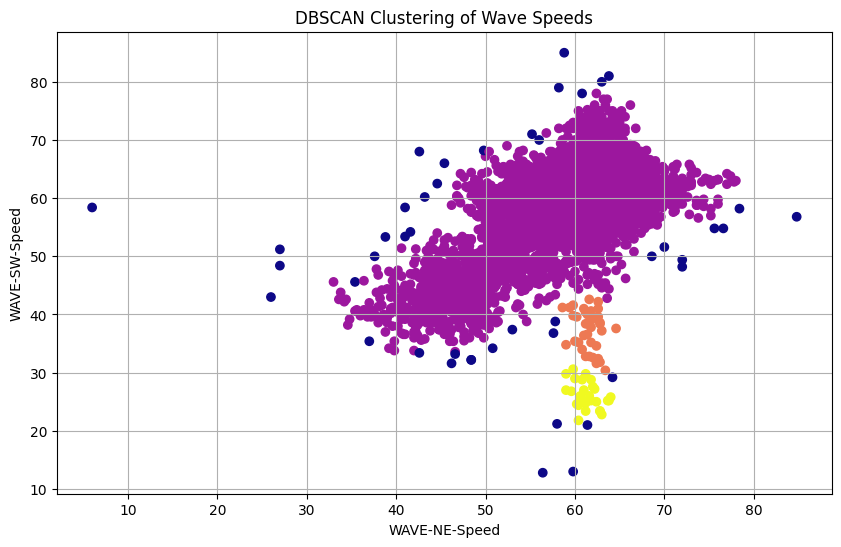

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Drop rows with NaN in the selected columns for clustering
df_cleaned_for_clustering = df.dropna(subset=['WAVE-NE-Speed', 'WAVE-SW-Speed'])

# Select features for clustering (e.g., WAVE-NE-Speed and WAVE-SW-Speed)
X_cluster = df_cleaned_for_clustering[['WAVE-NE-Speed', 'WAVE-SW-Speed']]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)
df_cleaned_for_clustering['dbscan_cluster'] = dbscan.fit_predict(X_cluster)

# Visualize the DBSCAN clusters
plt.figure(figsize=(10,6))
plt.scatter(X_cluster['WAVE-NE-Speed'], X_cluster['WAVE-SW-Speed'], c=df_cleaned_for_clustering['dbscan_cluster'], cmap='plasma')
plt.title('DBSCAN Clustering of Wave Speeds')
plt.xlabel('WAVE-NE-Speed')
plt.ylabel('WAVE-SW-Speed')
plt.grid(True)
plt.show()



Explanation:

    KMeans clustering will divide the data into three clusters (or however many you choose) based on the WAVE-NE-Speed and WAVE-SW-Speed columns, and plot these clusters in a scatter plot.

    DBSCAN clustering will find clusters based on density, identifying regions where data points are tightly packed and marking outliers (points not assigned to any cluster).

# Using pandas to read the Excel file directly from the GitHub repository

url = 'https://github.com/BarkhaM21/AI4CCEE_Fall_2024/raw/main/in_class_activity/Lecture5/Ames_August_Crashes.xls'

# Read the Excel file from the URL
df = pd.read_excel(url)

# Display the first few rows
df.head()

In [4]:
# import pandas as pd

# # Read the CSV file, skipping the initial unnecessary rows
# file_path = '/content/CrashData.csv'

# # Read the CSV starting from the row that contains actual headers (likely row 5)
# df_cleaned = pd.read_csv(file_path)

import pandas as pd

# Read the CSV file, skipping the initial unnecessary rows
file_path = '/content/CrashData.csv'

# Read the CSV file, handling potential errors
df_cleaned = pd.read_csv(file_path, on_bad_lines='skip') # skip lines with errors
# or
# df_cleaned = pd.read_csv(file_path, on_bad_lines='warn') # display a warning for lines with errors

# Display the first few rows of the DataFrame to verify
print(df_cleaned.head())


<ipython-input-4-321a96cb0d90>:15: DtypeWarning: Columns (0,2,4,5,6,8,10,12,20,24,26,27,29,30,32,34,36,38,40,42,43,44,45,47,48,50,52,54,56,58,60,61,62,64,66,68,70,72,74,76,78,82,84,86,93,94,95,97,99,101,102,103,104,105,106,107,108,114,116,117,118,119,123,125,127,129,136,138,149,151,153,155,157,159,161,163,171,173,175,177,179,180,200,201,202,203,205,207,210,212,214,216,217,218,219,220,221,222,223,224,225,230,232,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(file_path, on_bad_lines='skip') # skip lines with errors


  STATE STATENAME ST_CASE  VEH_NO_x DAMAGE      DAMAGENAME PEDS  PERNOTMVIT  \
0    19      Iowa  190001         1   11.0  11 Clock Value    0           0   
1    19      Iowa  190001         1   11.0  11 Clock Value    0           0   
2    19      Iowa  190001         1   11.0  11 Clock Value    0           0   
3    19      Iowa  190001         1   11.0  11 Clock Value    0           0   
4    19      Iowa  190001         1   13.0             Top    0           0   

  VE_TOTAL  VE_FORMS_x  ... DRUGRES3  DRUGRES3NAME P_SF1  P_SF1NAME P_SF2  \
0        1           1  ...      NaN           NaN   NaN        NaN   NaN   
1        1           1  ...      NaN           NaN   NaN        NaN   NaN   
2        1           1  ...      NaN           NaN   NaN        NaN   NaN   
3        1           1  ...      NaN           NaN   NaN        NaN   NaN   
4        1           1  ...      NaN           NaN   NaN        NaN   NaN   

   P_SF2NAME P_SF3  P_SF3NAME RACE  RACENAME  
0        NaN   

In [5]:
# Display the first few rows of the cleaned dataset
df_cleaned.head()



,STATE,STATENAME,ST_CASE,VEH_NO_x,DAMAGE,DAMAGENAME,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS_x,...,DRUGRES3,DRUGRES3NAME,P_SF1,P_SF1NAME,P_SF2,P_SF2NAME,P_SF3,P_SF3NAME,RACE,RACENAME
0,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,Iowa,190001,1,13.0,Top,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for missing values and data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61413 entries, 0 to 61412
Columns: 253 entries, STATE to RACENAME
dtypes: float64(57), int64(5), object(191)
memory usage: 118.5+ MB


In [7]:

# Create summary statistics
df_cleaned.describe()

,VEH_NO_x,PERNOTMVIT,VE_FORMS_x,PERSONS,COUNTY_x,CITY,MONTH_x,DAY_x,DAY_WEEK,YEAR,...,DRUGTST1,DRUGTST2,DRUGTST3,DRUGRES1,DRUGRES2,DRUGRES3,P_SF1,P_SF2,P_SF3,RACE
count,61413.000000,61413.000000,61413.000000,61413.000000,61413.000000,61413.000000,61413.000000,61413.000000,61413.000000,61413.000000,...,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,36062.000000,36062.000000,36062.000000,28984.000000
mean,2.645075,0.063537,4.029228,5.844544,110.279241,840.648885,5.689170,14.259049,3.833276,2019.942944,...,0.737420,0.034713,0.005573,60.011306,19.746338,3.852946,0.048888,0.038434,0.038434,1.239028
std,2.597379,0.316147,3.571776,4.653371,52.197083,1927.279234,3.480355,9.527495,1.952907,191.879018,...,1.680367,0.200498,0.080611,172.224381,121.008075,55.454272,2.093730,1.950276,1.950276,8.887133
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,2.000000,75.000000,0.000000,2.000000,5.000000,2.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,4.000000,113.000000,0.000000,6.000000,13.000000,4.000000,2019.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,5.000000,10.000000,157.000000,280.000000,9.000000,22.000000,5.000000,2021.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,4.000000,11.000000,16.000000,197.000000,9997.000000,12.000000,31.000000,7.000000,49482.000000,...,9.000000,2.000000,2.000000,999.000000,996.000000,996.000000,99.000000,99.000000,99.000000,99.000000


In [13]:


# Select relevant columns: 'HOUR_x' for time of day, 'AGE' for driver age, 'BODY_TYP' for vehicle type, and 'INJ_SEV' for crash severity
df_relevant = df_cleaned[['HOUR_x', 'AGE', 'BODY_TYP', 'INJ_SEV']].dropna()

# Define features (X) and target (y)
X = df_relevant[['HOUR_x', 'AGE', 'BODY_TYP']]
y = df_relevant['INJ_SEV']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')


Training features shape: (48402, 3)
Testing features shape: (12101, 3)
Training target shape: (48402,)
Testing target shape: (12101,)


In [16]:
# Step: Check the unique values in the target variable (INJ_SEV)
print(f'Unique values in INJ_SEV (crash severity): {y.unique()}')

# If the values are continuous, convert them into discrete categories
# For example, we can bin them if necessary (you can adjust the binning logic based on your data)

# Assuming INJ_SEV has integer severity levels (e.g., 0, 1, 2), but if not, categorize manually:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Retry fitting the model
rf_model.fit(X_train, y_train)

# Make predictions and evaluate as before
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Unique values in INJ_SEV (crash severity): [4.0 2.0 0.0 9.0 3.0 1.0 5.0 '2' '4' '0' '3' '1' '5']
Accuracy score: 0.9255433435253285
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3792
           1       0.97      0.92      0.94      1270
           2       0.84      0.88      0.86      1334
           3       0.84      0.86      0.85      1349
           4       0.93      0.92      0.93      4280
           5       0.95      0.78      0.86        23
           9       0.75      0.57      0.65        53

    accuracy                           0.93     12101
   macro avg       0.89      0.84      0.86     12101
weighted avg       0.93      0.93      0.93     12101



In [17]:
# Step 10: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 11: Create a Random Forest model with n_estimators=100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 12: Fit the model to the training data
rf_model.fit(X_train, y_train)

# Step 13: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 14: Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

# Step 15: Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Optional: To see crash severity predictions by age group
df_test_results = X_test.copy()
df_test_results['Predicted_Severity'] = y_pred
df_test_results['Actual_Severity'] = y_test.values

# Group by age to see average predictions for each age group
age_group_predictions = df_test_results.groupby('AGE').agg({
    'Predicted_Severity': 'mean',
    'Actual_Severity': 'mean'
})

print('Crash severity by age group:')
print(age_group_predictions)


Accuracy score: 0.9255433435253285
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3792
           1       0.97      0.92      0.94      1270
           2       0.84      0.88      0.86      1334
           3       0.84      0.86      0.85      1349
           4       0.93      0.92      0.93      4280
           5       0.95      0.78      0.86        23
           9       0.75      0.57      0.65        53

    accuracy                           0.93     12101
   macro avg       0.89      0.84      0.86     12101
weighted avg       0.93      0.93      0.93     12101

Crash severity by age group:
       Predicted_Severity  Actual_Severity
AGE                                       
0.0              1.611111         1.611111
1.0              2.857143         2.857143
2.0              3.724138         3.724138
3.0              2.656250         2.718750
4.0              2.172414         2.310345
...            

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
import os

# Define the path to your file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Class5_Miguel_Diaz.ipynb'
print(os.listdir(os.path.dirname(file_path)))  # To verify that the file exists


['FinalProject', 'Untitled0.ipynb', 'Copy of Untitled0.ipynb', 'Copy of Geopandas-Script-Miguel Diaz.ipynb', 'Copy of DCGAN_Assignment_fashionMNIST (1).ipynb', 'Copy of DCGAN_Assignment_fashionMNIST.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Final_Project_EE526_Miguel_Diaz-Ingrid_Cintura.ipynb', 'M-FinalProject_CNN_DroughtPrediction.ipynb', 'Miguel Diaz-Act4.ipynb', 'Miguel Diaz - Act3', 'Miguel Diaz - Activity 5.ipynb', 'HW6-Miguel Diaz', 'Class4_Miguel_Diaz.ipynb', 'GIT_SCHEDULER_Example.ipynb', 'GIT_SCHEDULER.ipynb', 'Class5_Miguel_Diaz.ipynb']
